In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [5]:
import confusion_matrix_pretty_print as cmpp

In [6]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [60]:
clf = boosted

In [61]:
%time boosted.fit(X_train,y_train)

CPU times: user 793 ms, sys: 0 ns, total: 793 ms
Wall time: 801 ms


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=40, random_state=None)

In [62]:
y_pred = clf.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, y_pred)

0.5453846153846154

In [12]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [64]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [65]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[184 195  20]
 [100 415 139]
 [ 14 123 110]]


In [66]:
labels = ['Ok','Good','Great']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

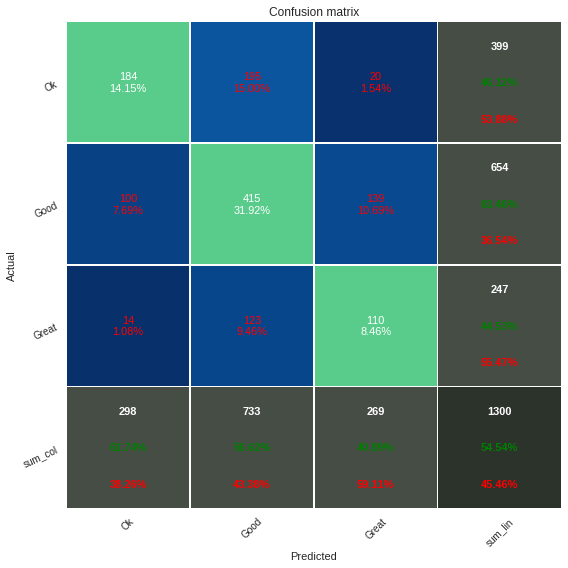

In [67]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [68]:
cm.sum(axis=1)

array([399, 654, 247])

In [69]:
np.diag(cm)

array([184, 415, 110])

In [70]:
cm.sum(axis=1) - np.diag(cm)

array([215, 239, 137])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [71]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[184 415 110]
[114 318 159]
[215 239 137]
[787 328 894]


## Accuracy: How often correct?  _Diagonal / Total_

In [72]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.5453846153846154
0.5453846153846154


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [73]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.45461538461538464
0.4546153846153846


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [23]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.62571429 0.58373984 0.38507463]
[0.62571429 0.58373984 0.38507463]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [24]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.54887218 0.54892966 0.52226721]
[0.54887218 0.54892966 0.52226721]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [25]:
print(FP / (TN + FP))

[0.14539401 0.39628483 0.19563153]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [26]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.85460599 0.60371517 0.80436847]
[0.85460599 0.60371517 0.80436847]


In [27]:
metrics.matthews_corrcoef(y_test,y_pred)

0.27797818372469957

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [28]:
X_train.shape

(5197, 11)

In [29]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

In [30]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [31]:
print(clf)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


In [32]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [33]:
print(train_scores)
print(validation_scores)

[[1.         0.94       0.94       0.94       0.94      ]
 [0.86346154 0.73269231 0.73269231 0.73269231 0.73269231]
 [0.64692308 0.63153846 0.66076923 0.66076923 0.66076923]
 [0.61038462 0.62153846 0.60884615 0.605      0.605     ]
 [0.60641026 0.60538462 0.58615385 0.5874359  0.59333333]
 [0.5939184  0.60277136 0.58795227 0.58371824 0.58852964]]
[[0.36664105 0.38307692 0.29484219 0.27405697 0.26733436]
 [0.41275942 0.40153846 0.40492687 0.49114704 0.4568567 ]
 [0.3812452  0.46923077 0.42186297 0.45419554 0.44607088]
 [0.44273636 0.46846154 0.51193226 0.50192456 0.47149461]
 [0.4358186  0.47307692 0.56735951 0.51270208 0.52850539]
 [0.443505   0.48538462 0.57582756 0.56658968 0.51771957]]


In [34]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [35]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.952000
520     0.758846
1300    0.652154
2600    0.610154
3900    0.595744
5196    0.591378
dtype: float64

50      0.317190
520     0.433446
1300    0.434521
2600    0.479310
3900    0.503493
5196    0.517805
dtype: float64


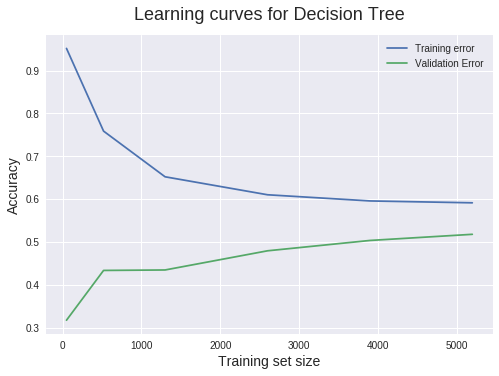

In [36]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [37]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [38]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

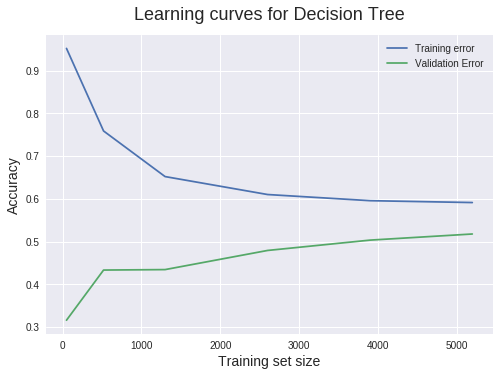

In [39]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [43]:
estimators = [x for x in range(1,51,10)]
learn_rate = [0.1,0.5,1.0,1.5,2.0]

param_grid = dict(n_estimators=estimators, learning_rate=learn_rate)

In [44]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

In [45]:
grid.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 11, 21, 31, 41], 'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007859,0.001446,0.002412,0.000557,0.1,1,"{'learning_rate': 0.1, 'n_estimators': 1}",0.463775,0.484303,0.541590,0.496537,0.032924,16,0.497460,0.527130,0.473575,0.499388,0.021906
1,0.056104,0.000543,0.007286,0.000112,0.1,11,"{'learning_rate': 0.1, 'n_estimators': 11}",0.505307,0.484303,0.554067,0.514545,0.029217,10,0.526328,0.527130,0.504731,0.519396,0.010375
2,0.096518,0.008598,0.011073,0.001140,0.1,21,"{'learning_rate': 0.1, 'n_estimators': 21}",0.520997,0.511542,0.543900,0.525473,0.013582,7,0.559353,0.540291,0.541195,0.546947,0.008781
3,0.123830,0.001389,0.014430,0.000164,0.1,31,"{'learning_rate': 0.1, 'n_estimators': 31}",0.520074,0.523084,0.535582,0.526243,0.006714,5,0.559815,0.552528,0.540965,0.551103,0.007761
4,0.191873,0.013727,0.023227,0.000066,0.1,41,"{'learning_rate': 0.1, 'n_estimators': 41}",0.522843,0.530933,0.552680,0.535478,0.012598,1,0.564434,0.552528,0.556427,0.557797,0.004956
5,0.006409,0.000068,0.001591,0.000037,0.5,1,"{'learning_rate': 0.5, 'n_estimators': 1}",0.463775,0.484303,0.541590,0.496537,0.032924,16,0.497460,0.527130,0.473575,0.499388,0.021906
6,0.054616,0.000718,0.006984,0.000042,0.5,11,"{'learning_rate': 0.5, 'n_estimators': 11}",0.524689,0.548938,0.521719,0.531784,0.012192,3,0.584527,0.559917,0.554581,0.566342,0.013042
7,0.085588,0.002313,0.009873,0.000022,0.5,21,"{'learning_rate': 0.5, 'n_estimators': 21}",0.507153,0.557710,0.533734,0.532861,0.020653,2,0.598614,0.575849,0.567736,0.580733,0.013071
8,0.122942,0.001623,0.014320,0.000156,0.5,31,"{'learning_rate': 0.5, 'n_estimators': 31}",0.502077,0.551247,0.524954,0.526089,0.020093,6,0.598845,0.586008,0.578352,0.587735,0.008455
9,0.162635,0.000522,0.018279,0.000192,0.5,41,"{'learning_rate': 0.5, 'n_estimators': 41}",0.504384,0.563712,0.526802,0.531630,0.024464,4,0.600924,0.587855,0.581814,0.590198,0.007975


In [47]:
grid.best_score_

0.5354779128828691

In [48]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 41}

In [49]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=41, random_state=None)

In [52]:
tree = DecisionTreeClassifier(min_samples_split=5, max_depth=6)

In [53]:
boosted = AdaBoostClassifier(base_estimator=tree, learning_rate=0.1, n_estimators=40)

In [54]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=boosted,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [55]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

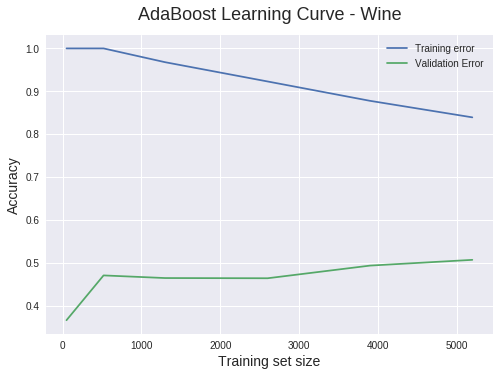

In [57]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('AdaBoost Learning Curve - Wine', fontsize = 18, y=1.03)
plt.legend()